In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


# 1. 장르별 100개 노래(수빈)와 감정-노래(리) 합치기

In [10]:
# 감정-노래(리) 데이터
re = pd.read_excel('../Data/recommender_data.xlsx')
re.head()

,song id,tag count,tag max,emotion count,emotion max
0,0,"{'비오는날': 2, '드라이브': 1, '추억': 1, '회상': 1}",['비오는날'],{'우울한': 1},['우울한']
1,3,"{'드라이브': 2, '여행': 1, '기분전환': 3, '신나는': 3, '클럽'...","['기분전환', '신나는']",{'행복한': 2},['행복한']
2,5,"{'비오는날': 1, '휴식': 1, '힐링': 1, '기분전환': 1}","['비오는날', '휴식', '힐링', '기분전환']","{'우울한': 1, '잔잔한': 1, '행복한': 2}",['행복한']
3,6,"{'산책': 1, '조깅': 1}","['산책', '조깅']","{'행복한': 1, '경쾌한': 1}","['행복한', '경쾌한']"
4,9,{'위로': 1},['위로'],{'우울한': 1},['우울한']


In [14]:
# 장르별 100개 노래 (수빈)데이터
subin = pd.read_csv('../Data/sample_song_tag(re).csv')
subin.head()

,곡 세부 장르 리스트,발매일,앨범 명,앨범 ID,아티스트 ID 리스트,곡 제목,곡 장르 리스트,아티스트 리스트,곡 ID,대분류str,소분류str,index,tags
0,"['GN0105', 'GN0101']",20171204,이별할 사람들,10116825,[711476],생각해봤어,['GN0100'],['한동근'],601158,GN0100,"GN0105, GN0101",601158.0,겨울 휴식 매장음악 카페 잔잔한 추억 기분전환 사랑 발라드감성 발라드 감수성 생각정...
1,"['GN0105', 'GN0101']",20170907,12,10094319,[946813],쉼이 필요해,['GN0100'],['오연준'],49993,GN0100,"GN0105, GN0101",49993.0,우울할때 기분전환 지칠때듣는노래 스트레스해소 사회생활
2,"['GN0501', 'GN0101', 'GN0506', 'GN0509']",20170911,예외,10095187,[205707],두려워질만큼 (2017),"['GN0500', 'GN0100']",['슈가볼'],441514,"GN0500,GN0100","GN0501, GN0101, GN0506, GN0509",441514.0,노노 가짜자기전에 밤 새벽스윗마인드 겨울 감성 어쿠스틱 카페 까페 커피 따뜻한 인디...
3,"['GN0105', 'GN0101']",20151207,그 곳,2655009,[924434],그 곳 (Feat. 김태홍),['GN0100'],['허준범'],24222,GN0100,"GN0105, GN0101",24222.0,매장음악 까페매장음악 까페매장음악 까페
4,"['GN0105', 'GN0101']",20160715,듀엣가요제 15회,2698210,"[1767, 792525]",사랑 그 쓸쓸함에 대하여,['GN0100'],"['김윤아', '채보훈']",294087,GN0100,"GN0105, GN0101",294087.0,바다 여름 봄쓸쓸함 감성 가을 눈물생각 카페 외로움산책 감성 드라이브 카페 발라드슬...


In [16]:
# 사이즈 확인
print(re.shape)
print(subin.shape)

(395365, 5)
(1600, 13)


In [28]:
# 데이터 합치기
merged_data = pd.merge(re, subin, how='inner', left_on='song id', right_on='곡 ID')
merged_data.sample()

,song id,tag count,tag max,emotion count,emotion max,곡 세부 장르 리스트,발매일,앨범 명,앨범 ID,아티스트 ID 리스트,곡 제목,곡 장르 리스트,아티스트 리스트,곡 ID,대분류str,소분류str,index,tags
677,435301,"{'스트레스': 1, '위로': 1, '기분전환': 1}","['스트레스', '위로', '기분전환']","{'긴장되는': 1, '우울한': 1, '행복한': 1}","['긴장되는', '우울한', '행복한']",['GN1701'],20160428,Folksongs,2682061,"[307269, 757015]",A Baby In The Island,['GN1700'],"['이선지', '장진주']",435301,GN1700,GN1701,435301.0,스트레스 위로 기분전환


In [29]:
# 합친 데이터 크기 확인
merged_data.shape

(1044, 18)

In [89]:
# merged data에 해당되는 감정 비율 확인하기
import re

merged_data_emotion = []
for i in merged_data["emotion max"]:
    n = len(i.split(','))
    for j in range(n):
        merged_data_emotion.append(i.split(',')[j])
        
x = [re.sub(r'[^ㄱ-ㅣ가-힣]+', '', i) for i in merged_data_emotion]

emo_df_num = pd.DataFrame(x).value_counts()
emo_df_num = pd.DataFrame(emo_df_num)
emo_df_num.columns=['num']
emo_df_num.reset_index(inplace=True)
emo_df_num.columns=['emo', 'num']
emo_df_num

,emo,num
0,행복한,539
1,잔잔한,343
2,경쾌한,209
3,우울한,117
4,긴장되는,37
5,무서운,27
6,편안한,10
7,울고싶은,1


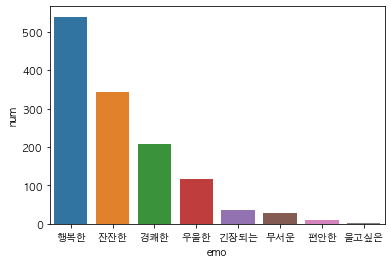

In [92]:
# plot 그리기
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'AppleGothic'

sns.barplot(data= emo_df_num, x='emo',y= "num", ci=None)
plt.show()

In [94]:
#데이터 저장
#merged_data.to_csv('../Data/merged_subin_re.csv', encoding='utf-8-sig')

In [125]:
# 노래-감정 비율 행렬 데이터 가져오기
song_emo_rating = pd.read_csv('../Data/song-emotion rating matrix.csv')
song_emo_rating2 = song_emo_rating.T
song_emo_rating2.columns = song_emo_rating2.iloc[0]
song_emo_rating2 = song_emo_rating2.drop(song_emo_rating2.index[0])
song_emo_rating2

Unnamed: 0,우울한,울고싶은,긴장되는,무서운,잔잔한,행복한,경쾌한,편안한
0,0.4,0.0,0.0,0.0,0.2,0.4,0.0,0.0
3,0.0,0.0,0.05,0.0,0.0,0.6,0.35,0.0
5,0.25,0.0,0.0,0.0,0.25,0.5,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
707979,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
707980,0.125,0.0,0.0,0.125,0.5,0.25,0.0,0.0
707982,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
707986,0.235294,0.0,0.0,0.029412,0.323529,0.411765,0.0,0.0


In [164]:
# merged_data에 해당되는 곡 ID만 고르기
song_list = []
for x in merged_data['곡 ID']:
    song_list.append(str(x))
    
selected_song_emo_rating = song_emo_rating2.loc[song_list]

#selected_song_emo_rating.to_csv('selected_song_emo_rating.csv', encoding='utf-8-sig')
#selected_song_emo_rating = pd.read_csv('selected_song_emo_rating.csv')

selected_song_emo_rating.columns = ['곡 ID', '우울한', '울고싶은', '긴장되는', '무서운', '잔잔한', '행복한', '경쾌한', '편안한']
selected_song_emo_rating

,곡 ID,우울한,울고싶은,긴장되는,무서운,잔잔한,행복한,경쾌한,편안한
0,1890,0.000000,0.0,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000
1,2491,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
2,2548,0.057851,0.0,0.049587,0.008264,0.173554,0.553719,0.140496,0.016529
3,3272,0.000000,0.0,0.062500,0.000000,0.000000,0.375000,0.562500,0.000000
4,3762,0.363636,0.0,0.090909,0.090909,0.181818,0.272727,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
1039,705055,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
1040,705682,0.043478,0.0,0.043478,0.000000,0.086957,0.652174,0.173913,0.000000
1041,706138,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000
1042,706749,0.000000,0.0,0.027397,0.000000,0.027397,0.575342,0.356164,0.013699


In [169]:
# 데이터 저장
#selected_song_emo_rating.to_csv('../Data/selected_song_emo_rating.csv', encoding='utf-8-sig', index=False)

In [168]:
selected_song_emo_rating

,곡 ID,우울한,울고싶은,긴장되는,무서운,잔잔한,행복한,경쾌한,편안한
0,1890,0.000000,0.0,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000
1,2491,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
2,2548,0.057851,0.0,0.049587,0.008264,0.173554,0.553719,0.140496,0.016529
3,3272,0.000000,0.0,0.062500,0.000000,0.000000,0.375000,0.562500,0.000000
4,3762,0.363636,0.0,0.090909,0.090909,0.181818,0.272727,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
1039,705055,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
1040,705682,0.043478,0.0,0.043478,0.000000,0.086957,0.652174,0.173913,0.000000
1041,706138,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000
1042,706749,0.000000,0.0,0.027397,0.000000,0.027397,0.575342,0.356164,0.013699


In [ ]:
#emotion = pd.DataFrame(all).T
#emotion.index = idx
#emotion.columns = rating.columns
#emotion

# 2. 가사 및 곡 정보 반영

- 가사 및 앨범 사진 크롤링 (1차 melon, 2차 genie)
- 영어 맞춤법 검사 > 한글 번역 > 한글 맞춤법 검사
- output: '가사형태소분석완료.csv'


In [183]:
# 곡 정보 반영
merged_data.drop('곡 ID', axis=1, inplace=True)
merged_data.drop('index', axis=1, inplace=True)
all_df = pd.merge(merged_data, selected_song_emo_rating, how='inner', left_on='song id', right_on='곡 ID')
all_df.drop('곡 ID', axis=1, inplace=True)
all_df.sample()

,song id,tag count,tag max,emotion count,emotion max,곡 세부 장르 리스트,발매일,앨범 명,앨범 ID,아티스트 ID 리스트,...,소분류str,tags,우울한,울고싶은,긴장되는,무서운,잔잔한,행복한,경쾌한,편안한
198,135124,"{'상큼한': 1, '카페': 1}","['상큼한', '카페']","{'경쾌한': 1, '잔잔한': 1}","['경쾌한', '잔잔한']","['GN1701', 'GN1706']",20050907,Debut,315871,[59510],...,"GN1701, GN1706",상큼한 카페 인디음악 발랄한 뉴에이지 CF배경음악 팝 광고음악,0.0,0.0,0.0,0.0,0.5,0.0,0.5,0.0


In [188]:
# 데이터 순서 정리
all_df = all_df[['song id', '곡 제목', 'tag count', 'tag max', 'emotion max',
       '곡 세부 장르 리스트', '발매일', '앨범 명', '앨범 ID', '아티스트 ID 리스트',
       '곡 장르 리스트', '아티스트 리스트', '대분류str', '소분류str', 'tags', '우울한', '울고싶은',
       '긴장되는', '무서운', '잔잔한', '행복한', '경쾌한', '편안한']]

In [192]:
# 크기 확인
all_df.shape

(1046, 23)

In [204]:
# 가사 반영하기 위해 데이터 읽기
lyrics = pd.read_csv('../Data/가사형태소분석완료.csv')
lyrics.head(2)

,index_n,노래,가수,원가사,좋아요수,어제순위,댓글1,댓글2,댓글3,댓글4,댓글5,1차 가공,2차 가공,3차 가공
0,0,생각해봤어,한동근,생각해봤어 우리의 얘기우리가 서로 그렇게다른 사람에게 떠들었을우리가 겪었던 일들을생...,942,없음,자작곡을 타이틀로 할 수는 없는 걸까요? ‘시간이 지난 곳’과이번앨범 ‘생각해봤어’...,역시 저음도 대박! 힘을 빼서 부른거 같아오롯이 목소리와 감성만 들리네요 이노래.....,말하듯이 부르는 거 너무 조타.. 후렴부분 찌릿,가사봐...,나지막히 부르는게 너무 좋아요. 오래오래 우리곁에서 노래해주세요~~,생각해봤어 우리의 얘기 우리가 서로 그렇게 다른 사람에게 떠들었을 우리가 겪었던 일...,생각해봤어 우리의 얘기 우리가 서로 그렇게 다른 사람에게 떠들었을 우리가 겪었던 일...,"['생각', '해봤다', '우리', '얘기', '우리', '서로', '그렇게', '..."
1,1,쉼이 필요해,오연준,자꾸 자꾸 재촉하지 말아요 나도 진짜 바쁘단 말이에요 학교 끝나면 방과후에 영어학원...,"1,654",없음,나두 쉼이 필요하다~~~~~,진짜 너무 노래좋고 공감되네요,우리연준이 이대로만 자라다오*.*,노래가 너무 좋아서 자꾸 듣게 되네요~~^^,이 노래 멜로디도 그렇고 연준군 목소리도 그렇고 너무 힐링돼요 진짜 이 노래 너무 ...,자꾸자꾸 재촉하지 말아요 나도 진짜 바쁘단 말이에요 학교 끝나면 방과 후에 영어학원...,자꾸자꾸 재촉하지 말아요 나도 진짜 바쁘단 말이에요 학교 끝나면 방과 후에 영어학원...,"['자꾸자꾸', '재촉', '하다', '말다', '나다', '진짜', '바쁘다', ..."


In [211]:
# 가사 데이터 합치기
song_all_info = pd.merge(all_df, lyrics, how='inner', left_on='곡 제목', right_on='노래')

song_all_info.drop('index_n', axis=1, inplace=True)
song_all_info.drop('노래', axis=1, inplace=True)

song_all_info = song_all_info[['song id', '곡 제목', '가수', 'tag count', 'tag max', 'emotion max', '곡 세부 장르 리스트',
       '발매일', '앨범 명', '앨범 ID', '아티스트 ID 리스트', '곡 장르 리스트', '아티스트 리스트', '대분류str',
       '소분류str', 'tags', '우울한', '울고싶은', '긴장되는', '무서운', '잔잔한', '행복한', '경쾌한',
       '편안한', '원가사', '좋아요수', '어제순위', '댓글1', '댓글2', '댓글3', '댓글4', '댓글5',
       '1차 가공', '2차 가공', '3차 가공']]

In [212]:
song_all_info.head(2)

,song id,곡 제목,가수,tag count,tag max,emotion max,곡 세부 장르 리스트,발매일,앨범 명,앨범 ID,...,좋아요수,어제순위,댓글1,댓글2,댓글3,댓글4,댓글5,1차 가공,2차 가공,3차 가공
0,1890,모든게 지나면,화랑,"{'뮤지컬': 1, '사랑': 1}","['뮤지컬', '사랑']","['경쾌한', '행복한']","['GN2902', 'GN1501', 'GN1507', 'GN2901']",20110621,뮤지컬 화랑 OST Vol.2,1315555,...,25,없음,없음,없음,없음,없음,없음,이 모든 것이 다 지나가고 또 시간이 흐르고 나면 그때는 모든 게 아무것도 아닌 일...,이 모든 것이 다 지나가고 또 시간이 흐르고 나면 그때는 모든 게 아무것도 아닌 일...,"['이', '모든', '것', '다', '지나가다', '또', '시간', '흐르다'..."
1,2491,You Brought A New Kind Of Love To Me,Ella Fitzgerald,"{'연말': 1, '새해': 1}","['연말', '새해']",['행복한'],['GN1701'],20180817,Ella Swings Lightly (Expanded Edition),5644325,...,1,없음,없음,없음,없음,없음,없음,없음,없음,['없다']


In [213]:
song_all_info.shape

(1077, 35)

In [4]:
# 데이터 저장
#song_all_info.to_csv('../Data/selected_song_all_info.csv', encoding='utf-8-sig', index=False)


In [5]:
song_all_info = pd.read_csv('../Data/selected_song_all_info.csv')
song_all_info[song_all_info['곡 제목'] == '생각해봤어']


,song id,곡 제목,가수,tag count,tag max,emotion max,곡 세부 장르 리스트,발매일,앨범 명,앨범 ID,...,좋아요수,어제순위,댓글1,댓글2,댓글3,댓글4,댓글5,1차 가공,2차 가공,3차 가공
939,601158,생각해봤어,한동근,"{'겨울': 2, '휴식': 1, '카페': 1, '잔잔한': 2, '추억': 1,...","['겨울', '잔잔한']",['잔잔한'],"['GN0105', 'GN0101']",20171204,이별할 사람들,10116825,...,942,없음,자작곡을 타이틀로 할 수는 없는 걸까요? ‘시간이 지난 곳’과이번앨범 ‘생각해봤어’...,역시 저음도 대박! 힘을 빼서 부른거 같아오롯이 목소리와 감성만 들리네요 이노래.....,말하듯이 부르는 거 너무 조타.. 후렴부분 찌릿,가사봐...,나지막히 부르는게 너무 좋아요. 오래오래 우리곁에서 노래해주세요~~,생각해봤어 우리의 얘기 우리가 서로 그렇게 다른 사람에게 떠들었을 우리가 겪었던 일...,생각해봤어 우리의 얘기 우리가 서로 그렇게 다른 사람에게 떠들었을 우리가 겪었던 일...,"['생각', '해봤다', '우리', '얘기', '우리', '서로', '그렇게', '..."
